In [1]:

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)


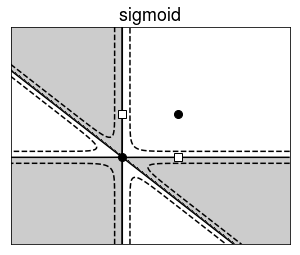

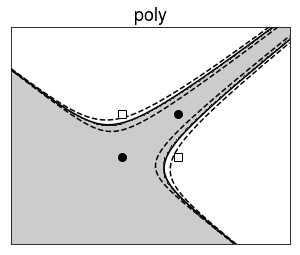

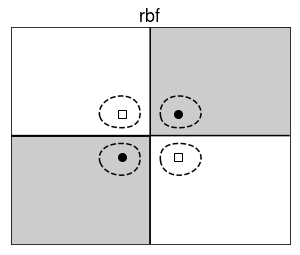

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from matplotlib.backends.backend_pdf import PdfPages
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
# XOR dataset and targets
X = np.c_[(0, 0),
          (1, 1),
          # -- -
          (1, 0),
          (0, 1)].T
Y = [0] * 2 + [1] * 2
# figure number
fignum = 1

# fit the model
for kernel in ('sigmoid', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=4, coef0 = 0)
    clf.fit(X, Y)
    with PdfPages(kernel + '1.pdf') as pdf:
        # plot the line, the points, and the nearest vectors to the plane
        fig, ax = plt.subplots()
        plt.figure(fignum, figsize=(4, 3))
        plt.clf()

        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                    facecolors='None')
        plt.plot(X[:2, 0], X[:2, 1], 'ko', markersize = 8)
        plt.plot(X[2:, 0], X[2:, 1], 'ws', mec = 'k',  markersize = 8)

        plt.axis('tight')
        x_min = -2
        x_max = 3
        y_min = -2
        y_max = 3

        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        plt.figure(fignum, figsize=(4, 3))
        CS = plt.contourf(XX, YY, np.sign(Z), 200, cmap='gray', alpha = .2)
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-.5, 0, .5])
        plt.title(kernel, fontsize = 18)
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)

        plt.xticks(())
        plt.yticks(())
        fignum = fignum + 1
        pdf.savefig()
plt.show()

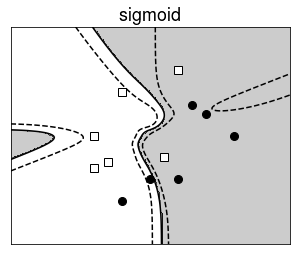

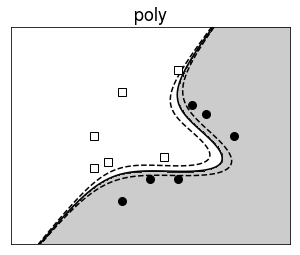

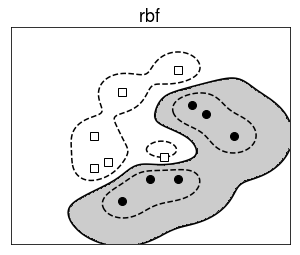

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# XOR dataset and targets
X = np.c_[(-1, -3),
          (0, -2),
          (1, -2),
          (2, 1),
          (3, 0),
          (1.5, 1.4),
          # -- -
          (1, 3),
          (0.5, -1),
          (-1, 2),
          (-2, -1.5),
          (-2, 0),
          (-1.5, -1.2)].T
N = 6
Y = [0] * N + [1] * N
# figure number

# means = [[2, 2], [4, 2]]
# cov = [[.7, 0], [0, .7]]
# N = 20
# X0 = np.random.multivariate_normal(means[0], cov, N) # each row is a data point 
# X1 = np.random.multivariate_normal(means[1], cov, N)

# X = np.vstack((X0, X1))
# Y = [0]*N + [1]*N
fignum = 1

# fit the model
for kernel in ('sigmoid', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=1, coef0 = 1)
    clf.fit(X, Y)
    with PdfPages(kernel + '3.pdf') as pdf:
        # plot the line, the points, and the nearest vectors to the plane
        fig, ax = plt.subplots()
        plt.figure(fignum, figsize=(4, 3))
        plt.clf()

        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                    facecolors='None')
        plt.plot(X[:N, 0], X[:N, 1], 'ko', mec = 'k', markersize = 8)
        plt.plot(X[N:, 0], X[N:, 1], 'ws', mec = 'k', markersize = 8)

        plt.axis('tight')
        x_min = -5
        x_max = 5
        y_min = -5
        y_max = 5

        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        plt.figure(fignum, figsize=(4, 3))
        CS = plt.contourf(XX, YY, np.sign(Z), 200, cmap='gray', alpha = .2)
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-.5, 0, .5])
        plt.title(kernel, fontsize = 18)
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)

        plt.xticks(())
        plt.yticks(())
        fignum = fignum + 1
        pdf.savefig()
plt.show()